# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

### What is the problem statement??<br>

A bank or credit union in South Florida obviously has different real estate market considerations than one in Seattle. Similarly, every financial institution has a unique business plan and its own appetite for risk.
That’s why many financial institutions aren’t interested in an off-the-shelf solution for automating their lending processes, particularly for automating loan decisions.<br>

However, automating loan decisions – or at a minimum, using technology to assist with loan decisioning – can create some major benefits.<br>
“Loan decisioning is an art with human intervention, and it relies on the skills of approving officers,”. “With an appropriate balance of technology and human oversight of both the decisioning process and final approval, automated technology-based scoring and decisioning tools can provide important benefits to an organization.”<br>
The benefits to automating loan decisions:<br>

1. Automating loan decisions allows banks to provide answers to loan applicants quickly, and it improves efficiency of the entire loan decision process. <br>
2. Automating loan decisions helps banks increase consistency in underwriting, approval and documentation that is customized to the bank’s policy. Bankers know that staff can interpret loan policy and even lending culture differently.
3. Automating loan decisions provides flexibility to ramp up or pull back on loan decisions as warranted by business strategy and the business environment.

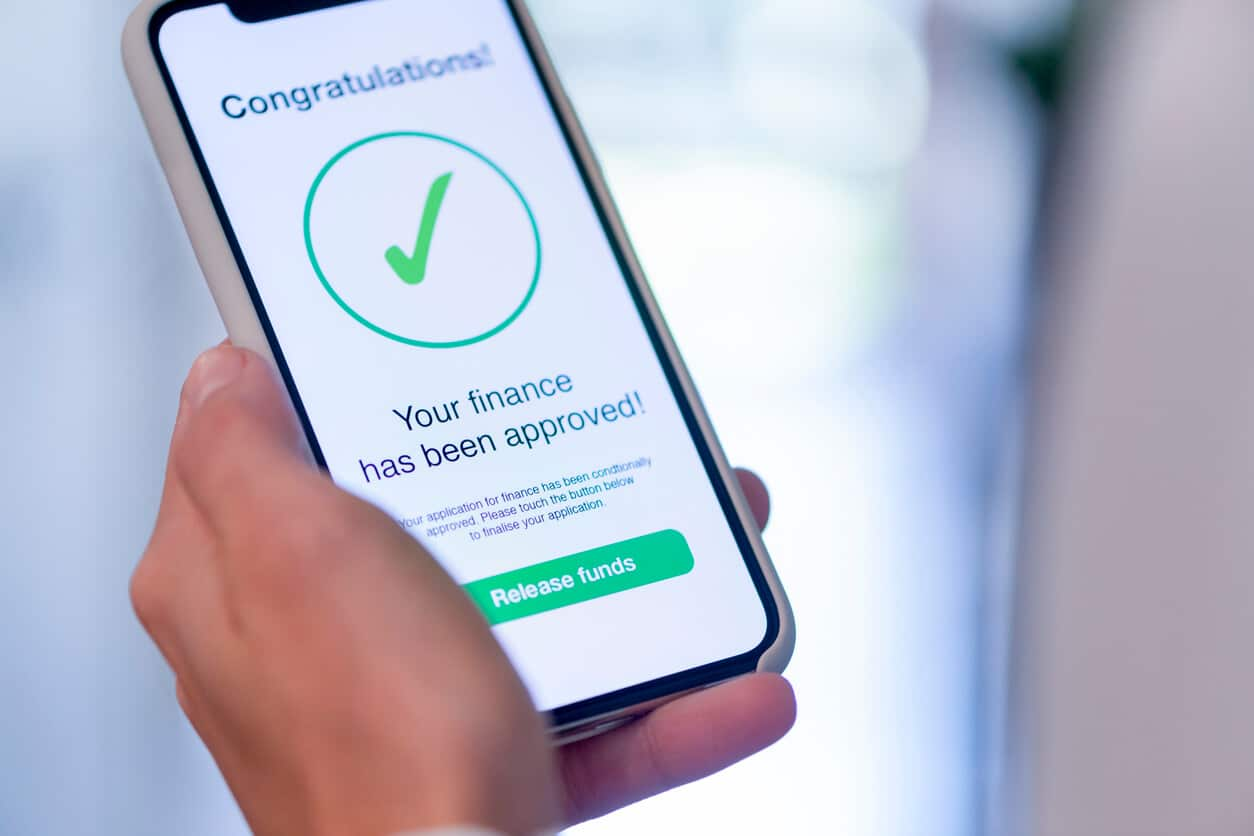

### Who are the stakeholders??
The Stakeholders interested in this analysis are the large banks such as JPMorgan Chase, Bank of America, Citigroup etc.... So that they can efficiently run their loan vertical with help of automating loan approval decision

<hr>
<hr>

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

First things first, let's import the libraries which will be used in our machine learning model.
>**Pandas:**<br> 
Pandas has been one of the most commonly used tools for Machine learning, which is used for data cleaning and analysis.Based on the features available in pandas we can say pandas is best for handling data. It can handle missing data, cleaning up the data and it supports multiple file formats. This means it can read or load data in many formats like CSV, Excel, SQL, etc.
In this project, we will load CSV file using Pandas. 

>**Numpy:**<br> 
NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

>**Math:**<br> 
Python has a built-in module that we can use for mathematical tasks. The math module has a set of methods and constants used to perform mathematical operations

>**SKLearn:**<br>
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.
>>**Logistic Regression:** It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.<br><br>
>>**KNN:** It is a Machine Learning Classification which works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).<br><br>
>>**Accuracy Score:** The accuracy_score function calculates the accuracy score for the final output we are trying to predict (target or Y) against the true outcome of the target.<br><br>
>>**ROC Curve:** AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

>**Seaborn:** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br>
>**Matplotlib:** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.<br><br>
>**Plotly:** The plotly library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases..<br><br>

In [1]:
# These libraries will be used to perform data analysis and mathematical operations
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import random

#These libraries will be used to build data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#If using dark background..
#plt.style.use('dark_background')

#These libraries will be used to perform our machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score 

# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

Let's first read 20 random samples of the data

In [2]:
df = pd.read_csv("loan_approval.csv") # Defining DataFrame
filename = "loan_approval.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 20 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df_random = pd.read_csv(filename, skiprows=skip)
df_random

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
0,1,1,32.75,1.50,1,1,0,0,0,0,0,1,0,0,1,0,0,0,5.50,1,1,3,1,1,0,0,0
1,1,1,27.67,2.00,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1.00,1,1,4,0,1,0,0,7544
2,1,0,60.58,16.50,1,1,0,1,0,0,0,0,0,1,0,0,0,0,11.00,1,0,0,1,1,0,0,10561
3,1,1,25.00,12.50,1,1,0,0,1,0,0,0,0,1,0,0,0,0,3.00,1,0,0,1,0,1,0,0
4,1,1,48.75,8.50,1,1,1,0,0,0,0,0,0,0,1,0,0,0,12.50,1,1,9,0,1,0,0,1655
5,1,0,20.75,10.25,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0.71,1,1,2,1,1,0,0,0
6,1,1,65.42,11.00,1,1,0,0,0,0,0,0,1,0,0,0,0,1,20.00,1,1,7,1,1,0,0,0
7,1,1,20.50,10.00,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2.50,1,0,0,0,0,1,0,0
8,0,0,31.92,3.12,1,1,0,0,0,1,0,0,0,0,0,1,0,0,3.04,0,1,2,1,1,0,0,4
9,0,1,27.83,1.50,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.25,0,1,1,1,1,0,0,3


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** approved (1 if loan is approved, 0 otherwise)<br><br>

**Predictors**<br>
>**gender:** The gender of loan applicant.<br>

>**age:** The age of loan applicant.s<br>

>**debt:** The current debt of loan applicant<br>

>**married:** The marital status of loan applicant.<br> 

>**employed:** Tells about the purpose of loan.<br>

>**ethnicity:** Tells about the ethnicity of loan applicant.<br>

>**years employed:** Tells us the number of years the loan applicant has been employed.<br>

>**prior default:** Tells us if loan applicant has defaulted a loan previously.<br>

>**employed:** Tells us if loan applicant is currently employed or not.<br>

>**credit_score:** Tells us the loan applicant credit score.<br>

>**drivers_license:** Tells us if the loan applicant has valid driver license to ensure his/her real identity.<br>

>**citizen:** Tells us the citizenship of loan applicant.<br>

>**income:** Tells us the income of loan applicant.<br>

>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

In [3]:
#Checking if duplicate values exist or any outliers.... 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
approved,690.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
gender,690.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
age,690.00,31.51,11.86,13.75,22.67,28.46,37.71,80.25
debt,690.00,4.76,4.98,0.00,1.00,2.75,7.21,28.00
married,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
bank_customer,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
emp_industrial,690.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
emp_materials,690.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
emp_consumer_services,690.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
emp_healthcare,690.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00


> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>
We will Include everything qs all predictors are highly correlated with our target variable<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.<br><br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>



In [12]:
#Defining our Target Variable
target = ['approved']

#Defining X and Y
X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this **AFTER** splitting the data because we only want to use summary stats<br>
>**Data normalization** is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.


In [5]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [X] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [6]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.72
1,3,0.77
2,5,0.79
3,7,0.78
4,9,0.78
5,11,0.78
6,13,0.78
7,15,0.78
8,17,0.79
9,19,0.80


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 11 as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [7]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.84
Testing data Accuracy: 0.78


>**Logistic Model:** <a class="anchor" id="second-model"></a> 
<br>
>Let's produce the same table above but this time using a Logistic Model

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.89
Testing data Accuracy: 0.85


>**Winning Model:**<a class="anchor" id="third-model"></a> 
<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

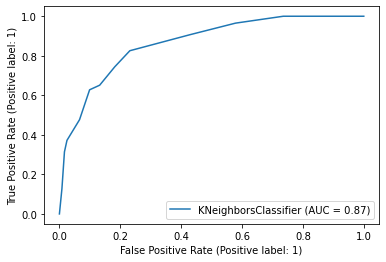

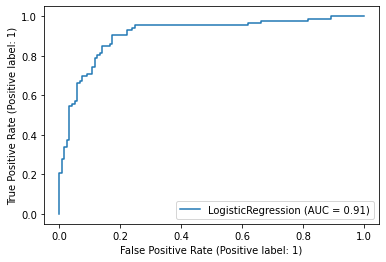

In [9]:
# ROC curve for kNN
RocCurveDisplay.from_estimator(knn, X_test, y_test)

# ROC curve for Logistic Model
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)

>**Decision Point:**<br>
AUC is highest for our **Logistic Regression Model** i.e 0.91,  so I will use this model to further evaluate probability thresholds and corresponding performance measures

In [10]:
#Performance of Logistic Regression model across different probablity thresholds....
class_perf_measures(lr_model,X_test,y_test)

C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,86,0,121,0,0.41,1.00,0.42
1,0.10,82,78,43,4,0.66,0.95,0.77
2,0.20,82,91,30,4,0.73,0.95,0.84
3,0.30,78,94,27,8,0.74,0.91,0.83
4,0.40,74,100,21,12,0.78,0.86,0.84
5,0.50,70,105,16,16,0.81,0.81,0.85
6,0.60,64,108,13,22,0.83,0.74,0.83
7,0.70,61,109,12,25,0.84,0.71,0.82
8,0.80,54,114,7,32,0.89,0.63,0.81
9,0.90,40,117,4,46,0.91,0.47,0.76


In order to decide which probablity threshold we should go ahead with, we need to think about what comes the costliest for a bank while predicting the loan approval decision. <br>
So, for a bank, if we are predicting the loan approval decision, **False negative** will prove out to be much more costly, because the customer will actually **default** the loan but our model will give a **Green Flag**.. Imagine this happens for over 1000 cases, the average loan amount given was 10000 dollars, <br>
So the bank is at risk of losing money **worth 10 million dollars**, and this is just a small number of cases, banks deals with lakhs of people so we can expect a much higher lose if False Negative cases are high..<br>
While on the other hand, we also need to maintain a low number of **False Positive** cases, Because in actual the customer is not likely to Default on Loan, but our model will predict that the customer will default on the loan..So, if False Positive cases are high, we might again loose out on the interest that we could earn from the customers.. Also, in highly competitive market, the customer might partner with some other bank and that's how we can loose out on revenues.. <br>
But again, the potential money that bank might loose out from False Positive cases will always be **much lesser** than the the money that the bank is at high risk of loosing in False Negative cases.. 
So, in a nutshell we are much more concerned here about **Recall**.

1. **Prob Threshold = 0.3**:<br>
|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  94                                           | 27                               |
| **1**    	                |  8                                            | 78                               |


So, the confusion matrix above shows 8 cases as flase negative, which is **Very Low** and good for the bank. And also, The why Recall is high at its **91%**. So as a bank, this would really work out well for them<br>
On the other hand, False Posotive which are 27 cases are slighthly high but will not cause much trouble for the bank, as the money they could loose from these customers will be much much lesser than the potential money they could loose if False negative cases are high... Let's move on....

<br><br>
2. **Prob Threshold = 0.5**:

|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  105                                          | 16                               |
| **1**    	                |  16                                           | 70                               |


So, Now the confusion matrix above shows 16 False Negative cases, which is **comparatively high** then the one at threshold of **0.3**, Thats why our recall has dropped to **81 %**. This also means that the risk of bank loosing money from the customers who default on their loan has increases.. Not a good sign..<br>
On the other hand, This has come at cost of False postive cases dropping slightly to 16 from 27...Which is good that we will have more customers partnering with the bank. But the money we could earn from them will be much much lesser than the money we are at risk of loosing by increase in False negative cases.. 

<br><br>
3. **Prob Threshold = 0.8**:

|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  114                                          | 7                                |
| **1**    	                |  32                                           | 54                               |

So, Now the confusion matrix above shows 32 False Negative cases, which is **very very huge** and **a big warning for the bank**, Also our target metric **Recall** is at its low at **63%**.This is an indicator that we are at high risk of loosing loads of money from the customers who are going to default their loan... <br>
On the other hand.. Our False positive cases have decreased to their lowest **7**.. But again, this drop won't benefit the bank much as the risk of loosing money is already at its high from big number of False Negative cases..<br><br>

**So which threshold we should go ahead with???**<br>
Hence, we will go ahead with probablity threshold of **0.3**, because it ensures a low number of False Negative cases, which are utmost important for the bank..This means that the bank will not be at high risk of loosing money from the defaulters..<br>
Also at this threshold the false positive cases are also not that big, which means the deserving customers will get the loan and they will continue to partner with bank and help them generate more revenues...

>[Go to Machine Learning Outline](#ml-model)
---

